## Use of multimodal models
Assume that you need to add a image to your prompt, how should we do?
```shell 
pip install -qU PyMuPDF pillow langchain-openai
```
PyMuPDF include the package **fitz**, running "pip install fitz" additionally will trigger bugs.

- Show how to convert the pdf into base64
- Show how to combine the base64 and prompt


data\demo.pdf


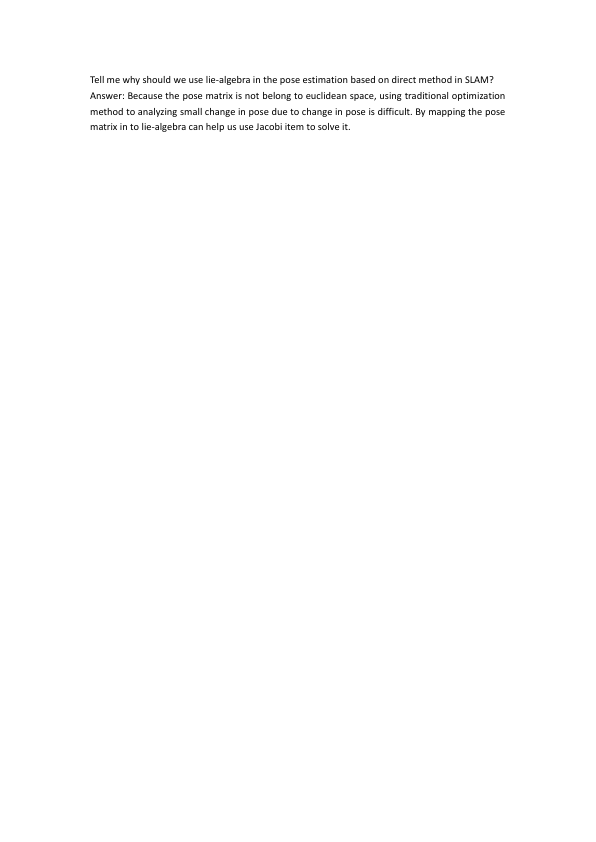

In [5]:
# Show how to convert the pdf into base64
import base64
import io

import fitz
from PIL import Image


def pdf_page_to_base64(pdf_path: str, page_number: int):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_number - 1)  # input is one-indexed
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    buffer = io.BytesIO()
    img.save(buffer, format="PNG")
    return base64.b64encode(buffer.getvalue()).decode("utf-8")

from IPython.display import Image as IPImage
from IPython.display import display
from pathlib import Path
filepath = Path("./data/demo.pdf")
base64_image = pdf_page_to_base64(filepath, 1)
display(IPImage(data=base64.b64decode(base64_image)))

In [11]:
from langchain_openai import ChatOpenAI
import os
os.environ['OPENAI_BASE_URL'] = 'https://api.91ai.me/v1'
os.environ['OPENAI_API_KEY'] = 'sk-l0qkKBnV71wSZsxv59678dDb32804b779fD18a7eAe541e05'
llm = ChatOpenAI(model="gpt-4o-mini")
from langchain_core.messages import HumanMessage
# build message
query = "Based on the given figure/image, tell me the question(if the answer is directly in given material you can copy that), the question is: \
        why should we use lie-algebra in direct method to estimate the camera pose?"
message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
# model invoke
response = llm.invoke([message])
print(response.content)

**Question:** Why should we use lie-algebra in the pose estimation based on the direct method in SLAM?

**Answer:** Because the pose matrix does not belong to Euclidean space, using traditional optimization methods to analyze small changes in pose due to changes in pose is difficult. By mapping the pose matrix into lie-algebra, we can use Jacobi items to solve it.
